## 앱 방문 데이터 분석

1. 개요

- 새로운 앱이 출시 되었다고 가정 한 후, 출시 후 사용자들의 방문 데이터를 이용하여 사용 패턴을 분석


- EDA & Visualization
- Statistical Analysis
- Conclusion
- Action Insight

2. Dataset (8 features)

- user_id = unique ID
- provider = 통신사 (S, K, L)
- AB_test = A/B test를 진행한 그룹 (A, B)
- version = 앱 버전 (V1, V2)
- join_date = 가입날짜
- visits = 앱 방문 회수
- avg_loding_time = 평균 앱 로딩타임
- sum_loading_time = 누적 앱 로딩타임

3. 목표

- 그룹간에 방문수의 차이가 존재하는지 통계적 검증
- 그룹간에 방문수의 차이가 통신사별로 존재하는지 확인
- 방문수와 다른 features 사이의 관계 모델링


In [1]:
import pandas as pd
import seaborn as sns
# https://seaborn.pydata.org/introduction.html
# pd.options.display.max_rows = 200

In [95]:
df = pd.read_csv("App_User_Data.csv")
pos_df = df[df["visits"] > 0]
print(len(df), len(pos_df), len(df)-len(pos_df), (len(df)-len(pos_df))/len(df))

328473 298806 29667 0.09031792567425632


In [9]:
print(df.describe())
print(df[df['AB_test']=='A'].describe())
print(df[df['AB_test']=='B'].describe())
# total visits mean = 9.113821
# group_a visits mean = 9.116789
# group_b visits mean = 9.107489

              visits  sum_loading_time  avg_loading_time
count  328473.000000     328473.000000     298806.000000
mean        9.113821         36.384233          3.998612
std         9.509663         52.988051          2.827580
min         0.000000          0.000000          0.004151
25%         2.000000          5.850964          1.921255
50%         6.000000         18.137140          3.351198
75%        13.000000         45.339411          5.385305
max       116.000000       1190.792778         29.468102
              visits  sum_loading_time  avg_loading_time
count  223634.000000     223634.000000     203303.000000
mean        9.116789         36.422077          4.003276
std         9.519189         53.177662          2.835860
min         0.000000          0.000000          0.007624
25%         2.000000          5.835218          1.921167
50%         6.000000         18.134197          3.351132
75%        13.000000         45.302576          5.395705
max       116.000000       1190

In [27]:
print(pos_df.describe())
print(pos_df[pos_df['AB_test']=='A'].describe())
print(pos_df[pos_df['AB_test']=='B'].describe())
# total visits mean = 10.018688
# group_a visits mean = 10.028499
# group_b visits mean = 9.997801

              visits  sum_loading_time  avg_loading_time
count  298806.000000     298806.000000     298806.000000
mean       10.018688         39.996648          3.998612
std         9.505095         54.240352          2.827580
min         1.000000          0.020860          0.004151
25%         3.000000          8.405555          1.921255
50%         7.000000         21.378619          3.351198
75%        14.000000         49.610369          5.385305
max       116.000000       1190.792778         29.468102
              visits  sum_loading_time  avg_loading_time
count  203303.000000     203303.000000     203303.000000
mean       10.028499         40.064410          4.003276
std         9.514918         54.449358          2.835860
min         1.000000          0.020860          0.007624
25%         3.000000          8.415649          1.921167
50%         7.000000         21.422075          3.351132
75%        14.000000         49.550493          5.395705
max       116.000000       1190

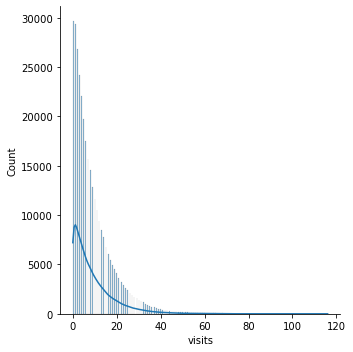

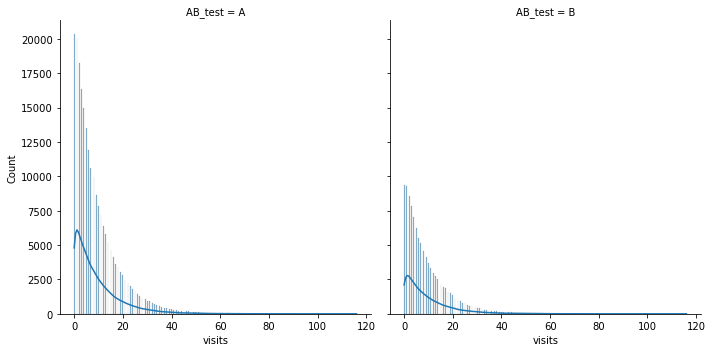

In [4]:
sns.displot(data=df, x="visits", kde=True)
sns.displot(data=df, x="visits", col='AB_test', kde=True)
# sns.jointplot(data=df, x="visits", y="avg_loading_time", hue="AB_test")

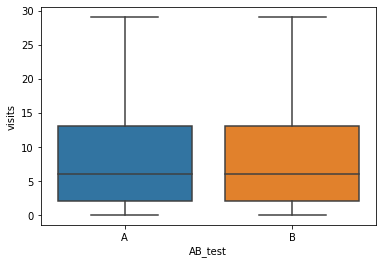

In [28]:
sns.boxplot(data=df, x="AB_test", y="visits", showfliers=False)

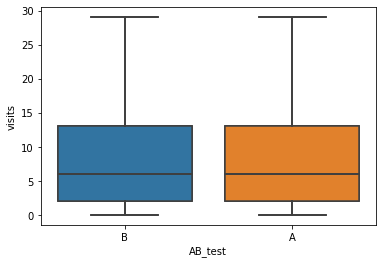

In [29]:
sns.boxplot(data=df[df['provider']=='S'], x="AB_test", y="visits", showfliers=False)

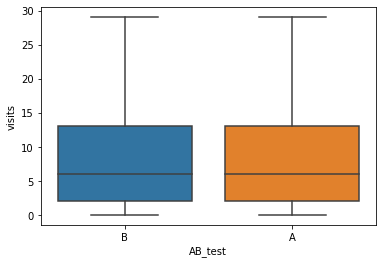

In [30]:
sns.boxplot(data=df[df['provider']=='K'], x="AB_test", y="visits", showfliers=False)

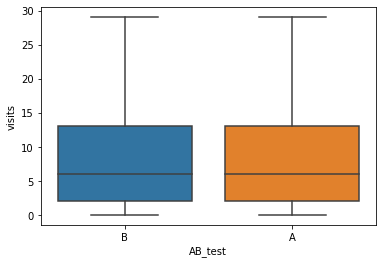

In [31]:
sns.boxplot(data=df[df['provider']=='L'], x="AB_test", y="visits", showfliers=False)

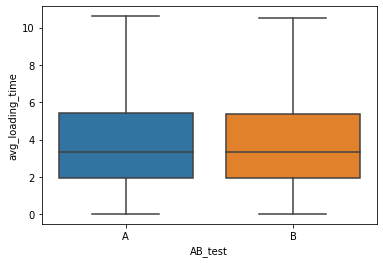

In [37]:
sns.boxplot(data=df, x="AB_test", y="avg_loading_time", showfliers=False)

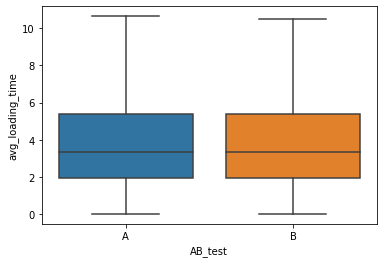

In [41]:
sns.boxplot(data=df[df['provider']=='S'], x="AB_test", y="avg_loading_time", showfliers=False)

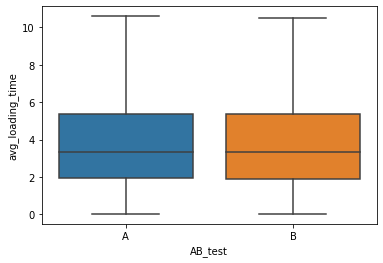

In [42]:
sns.boxplot(data=df[df['provider']=='K'], x="AB_test", y="avg_loading_time", showfliers=False)

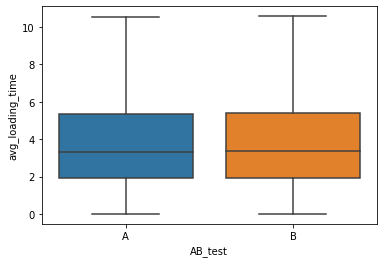

In [43]:
sns.boxplot(data=df[df['provider']=='L'], x="AB_test", y="avg_loading_time", showfliers=False)

In [32]:
# df.visits.value_counts()

In [33]:
# df.join_date.value_counts()

AB TEST 에 대해서 더 공부하고 통게적 차이를 찾는법을 더 찾아보자

그래도 방법이 안나온다면, 정말 그냥 차이가 없는것...

visits 변수는 order가 있는 discrete 변수이다?
ordinal 은 아니고 ratio variable, 그리고 poisson distribution 혹은 negative binomial distribution

Remember that the Poisson distribution assumes that the mean and variance are the same.

The negative binomial distribution has one parameter more than the Poisson regression that adjusts the variance independently from the mean.

In fact, the Poisson distribution is a special case of the negative binomial distribution.

ratio variable 의 hypothesis test 를 위해

In [ ]:
sns.displot(data=df, x="avg_loading_time", kde=True)
sns.displot(data=df, x="avg_loading_time", col='AB_test', kde=True)

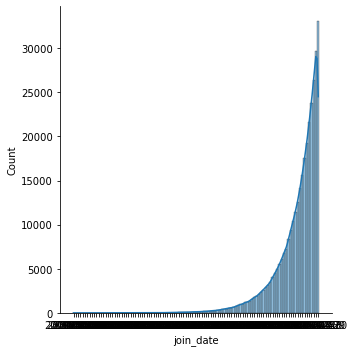

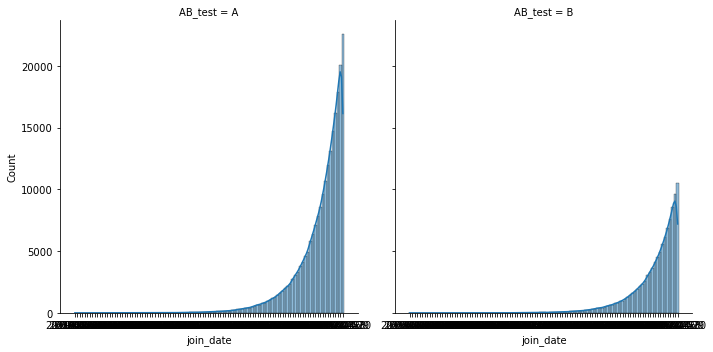

In [13]:
df = df.sort_values(by='join_date')
sns.displot(data=df, x="join_date", kde=True)
sns.displot(data=df, x="join_date", col='AB_test', kde=True)

In [47]:
df[df['join_date']=='2020-04-01']

,user_id,provider,AB_test,version,join_date,visits,sum_loading_time,avg_loading_time
117,5650c2d892323af63fcedd9c24b006d6,S,A,V1,2020-04-01,18,40.661547,2.258975
237,fa414b93372737f79fa565fc0c46615f,S,A,V2,2020-04-01,25,237.992088,9.519684
331,462902398b87b5f1529ff99daa53bacb,L,A,V1,2020-04-01,6,70.229179,11.704863
432,04f0e73ca2b32a628bb820156e89dd54,S,A,V1,2020-04-01,5,3.005518,0.601104
499,981bc6220aee86854a6c430aff98658c,S,B,V2,2020-04-01,1,0.070367,0.070367
...,...,...,...,...,...,...,...,...
327644,af308114e8c725f21fc3104c741fb58a,K,A,V1,2020-04-01,6,33.445155,5.574193
327799,2394c9c4538f1a0cdb5bdb1ed3ff4c0f,S,B,V1,2020-04-01,1,10.680603,10.680603
328193,4be320e2a0dc100682678eb83fcde908,L,A,V2,2020-04-01,17,76.317563,4.489268
328247,ae3fd5eaaeba7b9459803e50458e2880,S,B,V1,2020-04-01,5,15.579126,3.115825


2

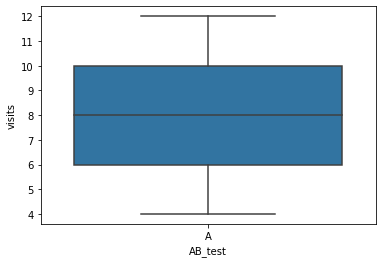

In [32]:
sns.boxplot(data=pos_df[pos_df['join_date']<'2020-01-01'], x="AB_test", y="visits", showfliers=False)
len(pos_df[pos_df['join_date']<'2020-01-01'])

30

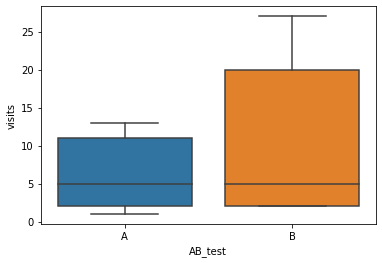

In [35]:
sns.boxplot(data=pos_df[pos_df['join_date']<'2020-02-01'], x="AB_test", y="visits", showfliers=False)
len(pos_df[pos_df['join_date']<'2020-02-01'])

496

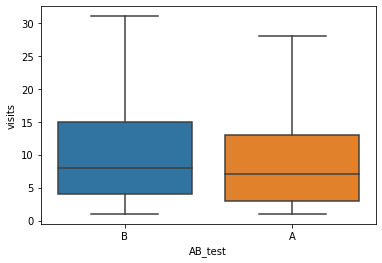

In [36]:
sns.boxplot(data=pos_df[pos_df['join_date']<'2020-03-01'], x="AB_test", y="visits", showfliers=False)
len(pos_df[pos_df['join_date']<'2020-03-01'])

2676

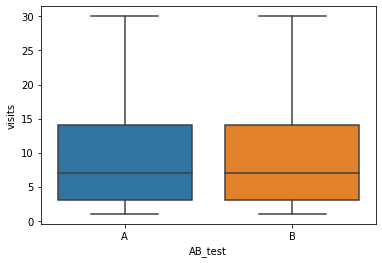

In [46]:
date = '2020-04-07'
sns.boxplot(data=pos_df[pos_df['join_date']==date], x="AB_test", y="visits", showfliers=False)
len(pos_df[pos_df['join_date']==date])

In [40]:
# sorted(df.join_date.unique())

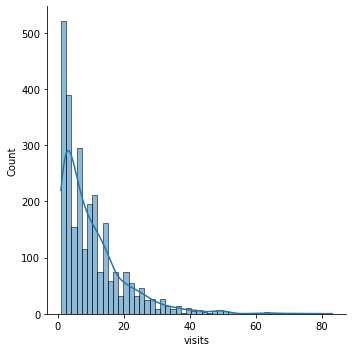

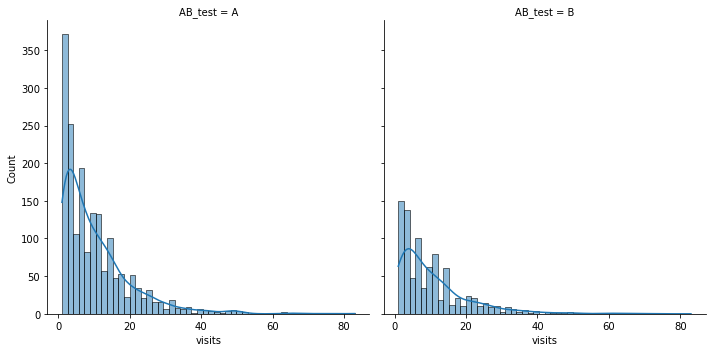

In [48]:
date = '2020-04-07'
sns.displot(data=pos_df[pos_df['join_date']==date], x="visits", kde=True)
sns.displot(data=pos_df[pos_df['join_date']==date], x="visits", col='AB_test', kde=True)
# sns.jointplot(data=df, x="visits", y="avg_loading_time", hue="AB_test")

In [81]:
# sns.jointplot(data=pos_df, x="visits", y="avg_loading_time", hue="AB_test")

## 가입일자별로 AB그룹의 평균 방문수 변화
- 1~2월에 총 5번의 튀는 날짜가 존재 확인 후 특정 유저의 방문수가 이상적으로 높음

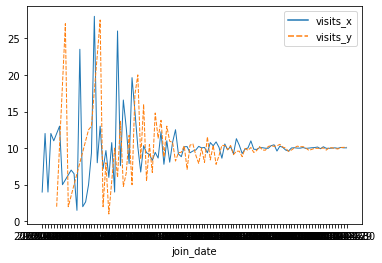

In [96]:
pd.options.display.max_rows = 200

A_pos_df = pos_df[pos_df['AB_test']=='A']
A_pos_date_mean_df = A_pos_df[["join_date", "visits"]].groupby(by=["join_date"]).mean()

B_pos_df = pos_df[pos_df['AB_test']=='B']
B_pos_date_mean_df = B_pos_df[["join_date", "visits"]].groupby(by=["join_date"]).mean()

pos_data_mean_merge = pd.merge(A_pos_date_mean_df, B_pos_date_mean_df, how='outer', left_index=True, right_index=True)
sns.lineplot(data=pos_data_mean_merge, palette="tab10", linewidth=1)

In [93]:
# pos_df[pos_df['join_date']=='2020-01-17']

In [92]:
# pos_df[pos_df['join_date']=='2020-01-25']

In [91]:
# pos_df[pos_df['join_date']=='2020-02-02']

In [90]:
# pos_df[pos_df['join_date']=='2020-02-04']

In [89]:
# pos_df[pos_df['join_date']=='2020-02-10']

## 가입일자별로 AB그룹의 평균 방문수 변화 (5명의 outliers 제거)
- 1~2월에 총 5번의 방문수가 튀는 날짜에 방문수가 비이상적으로 높은 유저 제외

In [98]:
pd.options.display.max_rows = 200

o_rm_pos_df = pos_df[pos_df['user_id']!='dbf4fbcc92339724380a6051cf2457ef']
o_rm_pos_df = o_rm_pos_df[o_rm_pos_df['user_id']!='beb5ece878cc952a1e07e310460d45e5']
o_rm_pos_df = o_rm_pos_df[o_rm_pos_df['user_id']!='323e1195eb0e321570fa787f232e59ab']
o_rm_pos_df = o_rm_pos_df[o_rm_pos_df['user_id']!='dc0e34b6653a5f0ebb960f386048c9dc']
o_rm_pos_df = o_rm_pos_df[o_rm_pos_df['user_id']!='86f3097f61980a016ae6bc9699c1a26d']

o_rm_A_pos_df = o_rm_pos_df[o_rm_pos_df['AB_test']=='A']
o_rm_A_pos_date_mean_df = o_rm_A_pos_df[["join_date", "visits"]].groupby(by=["join_date"]).mean()

o_rm_B_pos_df = o_rm_pos_df[o_rm_pos_df['AB_test']=='B']
o_rm_B_pos_date_mean_df = o_rm_B_pos_df[["join_date", "visits"]].groupby(by=["join_date"]).mean()

o_rm_pos_data_mean_merge = pd.merge(o_rm_A_pos_date_mean_df, o_rm_B_pos_date_mean_df, how='outer', left_index=True, right_index=True)

# 01-17 b dbf4fbcc92339724380a6051cf2457ef
# 01-25 a beb5ece878cc952a1e07e310460d45e5
# 02-02 a 323e1195eb0e321570fa787f232e59ab
# 02-04 b dc0e34b6653a5f0ebb960f386048c9dc
# 02-10 a 86f3097f61980a016ae6bc9699c1a26d
# 2월중순 이벤트?

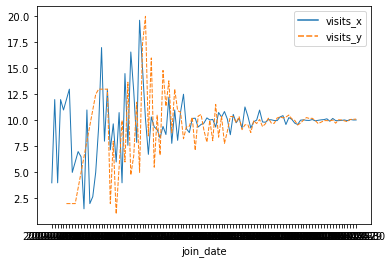

In [88]:
sns.lineplot(data=merge, palette="tab10", linewidth=1)

가입일 기준으로 현재날짜까지 가입기간을 계산해서, 가입시점별로 평균 일별 방문 횟수를 일자별로 보여주면?

아웃라이어? 0 값?

## 가입일자별 & 통신사별로 A/B 그룹 visits 확인

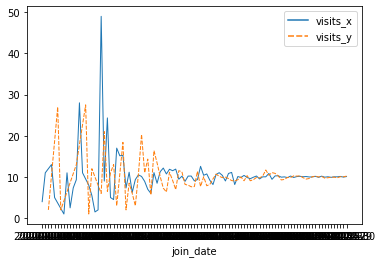

In [99]:
pd.options.display.max_rows = 200

S_pos_df = pos_df[pos_df['provider']=='S']

S_A_pos_df = S_pos_df[S_pos_df['AB_test']=='A']
S_A_pos_date_mean_df = S_A_pos_df[["join_date", "visits"]].groupby(by=["join_date"]).mean()

S_B_pos_df = S_pos_df[S_pos_df['AB_test']=='B']
S_B_pos_date_mean_df = S_B_pos_df[["join_date", "visits"]].groupby(by=["join_date"]).mean()

S_pos_data_mean_merge = pd.merge(S_A_pos_date_mean_df, S_B_pos_date_mean_df, how='outer', left_index=True, right_index=True)
sns.lineplot(data=S_pos_data_mean_merge, palette="tab10", linewidth=1)

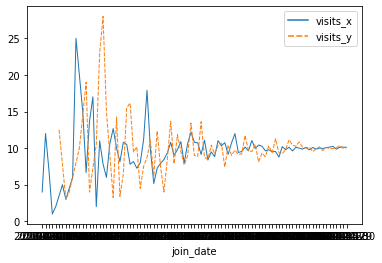

In [101]:
pd.options.display.max_rows = 200

K_pos_df = pos_df[pos_df['provider']=='K']

K_A_pos_df = K_pos_df[K_pos_df['AB_test']=='A']
K_A_pos_date_mean_df = K_A_pos_df[["join_date", "visits"]].groupby(by=["join_date"]).mean()

K_B_pos_df = K_pos_df[K_pos_df['AB_test']=='B']
K_B_pos_date_mean_df = K_B_pos_df[["join_date", "visits"]].groupby(by=["join_date"]).mean()

K_pos_data_mean_merge = pd.merge(K_A_pos_date_mean_df, K_B_pos_date_mean_df, how='outer', left_index=True, right_index=True)
sns.lineplot(data=K_pos_data_mean_merge, palette="tab10", linewidth=1)

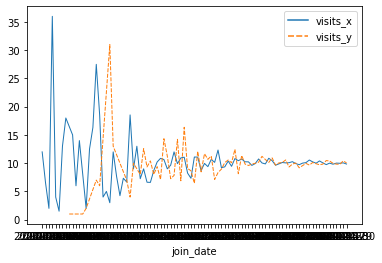

In [102]:
pd.options.display.max_rows = 200

L_pos_df = pos_df[pos_df['provider']=='L']

L_A_pos_df = L_pos_df[L_pos_df['AB_test']=='A']
L_A_pos_date_mean_df = L_A_pos_df[["join_date", "visits"]].groupby(by=["join_date"]).mean()

L_B_pos_df = L_pos_df[L_pos_df['AB_test']=='B']
L_B_pos_date_mean_df = L_B_pos_df[["join_date", "visits"]].groupby(by=["join_date"]).mean()

L_pos_data_mean_merge = pd.merge(L_A_pos_date_mean_df, L_B_pos_date_mean_df, how='outer', left_index=True, right_index=True)
sns.lineplot(data=L_pos_data_mean_merge, palette="tab10", linewidth=1)

In [ ]:
pd.options.display.max_rows = 200

pos_df = pos_df[pos_df['user_id']!='dbf4fbcc92339724380a6051cf2457ef']
pos_df = pos_df[pos_df['user_id']!='beb5ece878cc952a1e07e310460d45e5']
pos_df = pos_df[pos_df['user_id']!='323e1195eb0e321570fa787f232e59ab']
pos_df = pos_df[pos_df['user_id']!='dc0e34b6653a5f0ebb960f386048c9dc']
pos_df = pos_df[pos_df['user_id']!='86f3097f61980a016ae6bc9699c1a26d']

A_pos_df = pos_df[pos_df['AB_test']=='A']
A_pos_date_mean_df = A_pos_df[["join_date", "visits"]].groupby(by=["join_date"]).mean()
# A_pos_date_mean_df
B_pos_df = pos_df[pos_df['AB_test']=='B']
B_pos_date_mean_df = B_pos_df[["join_date", "visits"]].groupby(by=["join_date"]).mean()
# B_pos_date_mean_df
merge=pd.merge(A_pos_date_mean_df, B_pos_date_mean_df, how='outer', left_index=True, right_index=True)